
5.3	Huấn luyện ANN vẽ logo https://colab.research.google.com/github/mohammedterry/ANNs/blob/master/ML_ANN.ipynb 


In [4]:
import numpy as np 
import pandas as pd
import seaborn as sns
from sklearn.neural_network import MLPRegressor


In [1]:


class Neuron:  
  def __init__(self, n_inputs, bias = 0., weights = None):  
    self.b = bias
    if weights: self.ws = np.array(weights)
    else: self.ws = np.random.rand(n_inputs)
    
  def __call__(self, xs): #calculate the neuron's output: multiply the inputs with the weights and sum the values together, add the bias value, then transform the value via an activation function
    return self._f(xs @ self.ws + self.b) 
  
  def _f(self, x): #activation function (default: leaky_relu)
    return max(x*.1, x)


In [8]:
perceptron = Neuron(n_inputs = 3, bias = -0.1, weights = [0.7, 0.6, 1.4]) #using the same weights and bias value in the example above

In [2]:
perceptron([1.0, 0.5, -1.0]) #using the same inputs (and a leaky relu activation function), lets calculate the output value

NameError: name 'perceptron' is not defined

In [10]:
test_data = np.random.rand(1000,2)

In [3]:
perceptron = Neuron(n_inputs = 2, weights = [-1.3, -0.7], bias = 1.) 
test_predictions = [perceptron(test) for test in test_data]
sns.scatterplot(x="x", y="y", hue="class",data=pd.DataFrame({'x':[x for x,_ in test_data], 'y':[y for _,y in test_data], 'class':['cats' if p >= 0.0 else 'dogs' for p in test_predictions]}))

NameError: name 'np' is not defined

<Axes: xlabel='x', ylabel='y'>

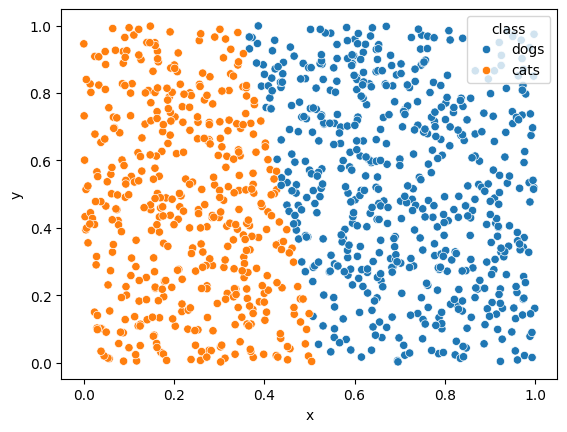

In [12]:
perceptron = Neuron(n_inputs = 2, weights = [-1.7, -0.3], bias = 0.9) 
test_predictions = [perceptron(test) for test in test_data]
sns.scatterplot(x="x", y="y", hue="class",data=pd.DataFrame({'x':[x for x,_ in test_data], 'y':[y for _,y in test_data], 'class':['cats' if p >= 0.0 else 'dogs' for p in test_predictions]}))

In [13]:
from PIL import Image
image = Image.open('./data/ins_logo.png')

In [14]:
new_size = (100, 100)
r_image = image.resize(new_size)

# Lưu ảnh đã resize (nếu muốn lưu lại)
r_image.save('./data/ins_logo_resized.png')


In [15]:
image_array = np.asarray(r_image)

In [28]:
training_inputs,training_outputs = [],[]
for row,rgbs in enumerate(image_array):
  for column,rgb in enumerate(rgbs):
    training_inputs.append((row,column))
    r,g,b = rgb[:3]
    training_outputs.append((r/255,g/255,b/255))

In [29]:
ann = MLPRegressor(activation='relu', learning_rate = 'adaptive', alpha=1e-4, hidden_layer_sizes=(64, 64, 64), max_iter = 2000)
ann.fit(training_inputs, training_outputs)                         

MLPRegressor(hidden_layer_sizes=(64, 64, 64), learning_rate='adaptive',
             max_iter=2000)

In [27]:
ann.predict([[1,1]])

array([[-0.0017895 , -0.00843857,  0.00606449]])

In [31]:
predicted_outputs = ann.predict(training_inputs)

predicted_image_array = np.zeros_like(image_array)
i = 0
for row in enumerate(predicted_image_array.shape[0]):
  for column in range(predicted_image_array.shape[1]):
    r,g,b = predicted_outputs[i]
    predicted_image_array[row][column] = [r*255,g*255,b*255]
    i += 1
Image.fromarray(predicted_image_array)

TypeError: 'int' object is not iterable